In [2]:

from pandas import read_csv,DataFrame

A=read_csv("C:/Users/Ashish/Desktop/DataScience/Datasets/Cars93.csv")
A.head(1)

,Unnamed: 0,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
0,1,Acura,Integra,Small,12.9,15.9,18.8,25,31,None,...,5,177,102,68,37,26.5,11.0,2705,non-USA,Acura Integra


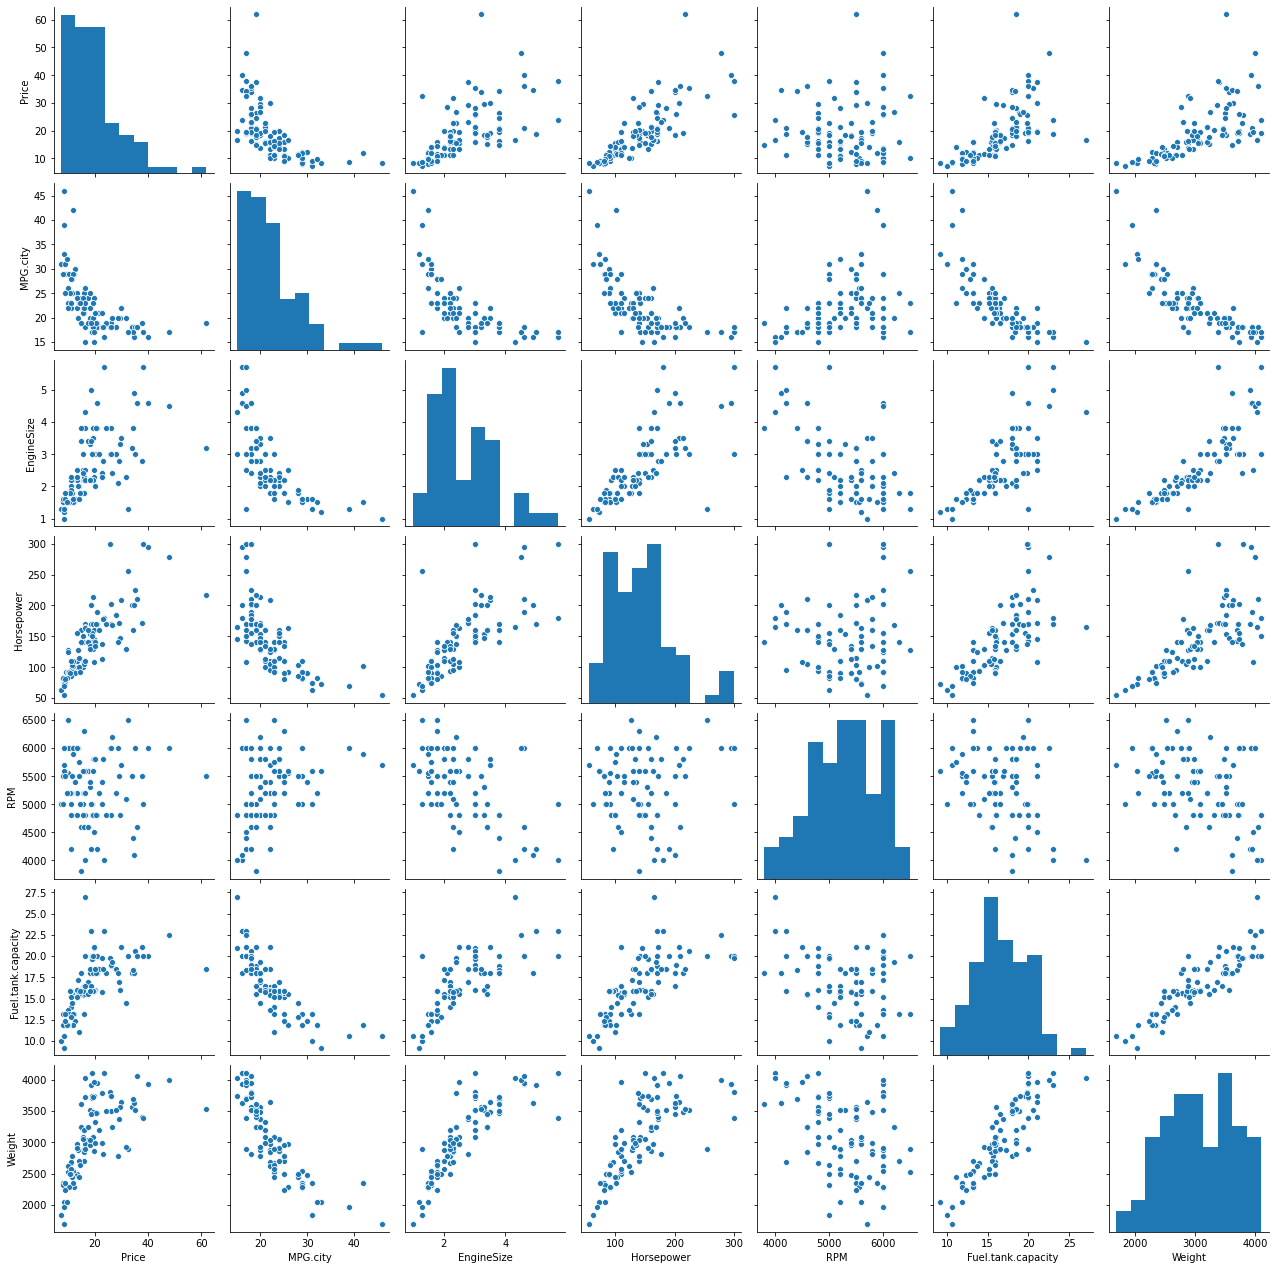

In [3]:

import seaborn as sb
sb.pairplot(A[["Price","MPG.city","EngineSize","Horsepower","RPM","Fuel.tank.capacity","Weight"]])


In [4]:

from sklearn.cluster import KMeans
km = KMeans(n_clusters=4)
B = A[["RPM","Horsepower"]]
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
B = DataFrame(B.apply(le.fit_transform),columns=B.columns)
model = km.fit(B)
B['cluster']=model.labels_


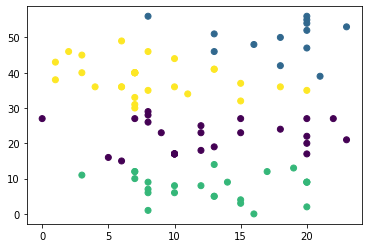

In [5]:

import matplotlib.pyplot as plt
plt.scatter(B.RPM,B.Horsepower,c=B.cluster)


In [6]:

B = A[["RPM","Horsepower"]]
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
le = LabelEncoder()
B = DataFrame(B.apply(le.fit_transform),columns=B.columns)

K = range(2,40,1)
WCSS = []
for i in K:
   km = KMeans(n_clusters=i)
   model = km.fit(B)
   WCSS.append(model.inertia_)


([<matplotlib.axis.XTick at 0x12b7b530>,
 <a list of 20 Text major ticklabel objects>)

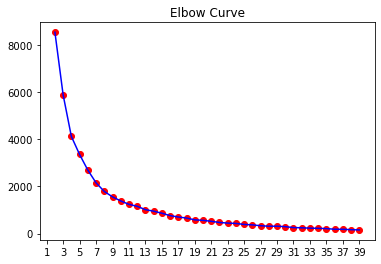

In [7]:


plt.scatter(K,WCSS,c="red")
plt.plot(K,WCSS,c="blue")
plt.title("Elbow Curve")
plt.xticks(range(1,41,2))


In [7]:


B[["RPM","Horsepower"]]


,RPM,Horsepower
0,22,27
1,13,46
2,13,41
3,13,41
4,16,48
...,...,...
88,5,16
89,18,24
90,18,42
91,12,18


# Heirachical Cluestering

In [8]:


from sklearn.cluster import AgglomerativeClustering
B = A[["RPM","Horsepower"]]
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
B = DataFrame(B.apply(le.fit_transform),columns=B.columns)
ag = AgglomerativeClustering(n_clusters=3)
model = ag.fit(B)
B['cluster']=model.labels_



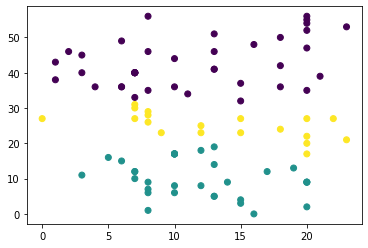

In [9]:

import matplotlib.pyplot as plt
plt.scatter(B.RPM,B.Horsepower,c=B.cluster)


C:\Users\Ashish\anaconda3\lib\site-packages\ipykernel_launcher.py:9: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  if __name__ == '__main__':


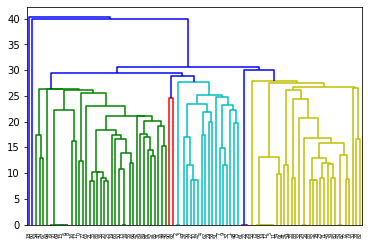

In [10]:

from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial import distance_matrix
import pandas as pd

# Create distance matrix for point to point distance
C = pd.DataFrame(distance_matrix(B.values,B.values))

# Create linkage for point to cluster and cluster to cluster distance
linkage_matrix = linkage(C)

# Pass linkage matrix to dendogram function and plot it
dendrogram(linkage_matrix)

import matplotlib.pyplot as plt
plt.show()


In [ ]:
yes